# Visualize Predictors

In [361]:
import pyns
import pandas as pd
from pathlib import Path
from IPython.display import Image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import numpy as np
from skimage.transform import resize
%matplotlib inline

In [88]:
STIM_PATH = Path('/media/neuroscout-data/neuroscout/file_data/stimuli/')

In [234]:
dataset_tasks =  {'HealthyBrainNetwork-movieDM': (8, 7),
 'SchematicNarrative-perception': (20, 40),
 'studyforrest-movie': (11, 16),
 'Raiders-raiders': (10, 9),
 'Life-life': (9, 8),
 'ParanoiaStory-story': (18, 38),
 'Sherlock-sherlockPart1': (21, 41),
 'SherlockMerlin-MerlinMovie': (5, 4),
 'LearningTemporalStructure-movie': (19, 39)}

In [205]:
def get_stimuli_values(predictor_name, dataset_id, task_id=None):
    runs = [r['id'] for r in api.runs.get(dataset_id=dataset_id, task_id=task_id)]
    preds = api.predictors.get(name=predictor_name, run_id=runs)
    if preds:
        predictor_id = preds[0]['id']
    else:
        return None

    pes = pd.DataFrame(api.predictor_events.get(predictor_id=predictor_id, stimulus_timing=True))
    stimuli_by_value = pes.groupby('stimulus_path').max().reset_index()
    
    return stimuli_by_value

In [334]:
def _load_impath(rel_path, dims=None):
    img = mpimg.imread(str(STIM_PATH / rel_path))
    
    if resize:
        img = resize(img, dims)
        
    return img

In [296]:
def bin_sv_min_max(sv, bin_length=60):
    sv['time_group'] = (sv.onset / bin_length).round()
    sv_binned_max = sv.groupby('time_group').apply(lambda x: x[x.value == x.value.max()]).sort_values('value')
    sv_binned_min = sv.groupby('time_group').apply(lambda x: x[x.value == x.value.min()]).sort_values('value')
    
    return sv_binned_min, sv_binned_max

In [372]:
sv = get_stimuli_values('hand', 20, 40)

In [374]:
sv_min, sv_max = bin_sv_min_max(sv, bin_length=60)

In [377]:
sv_max

stimulus_path  duration  \
time_group                                                                
12.0       673   6f13bbf219d101426fa97d2a6c0457b41ef6159d.png       1.0   
13.0       439   4af1b4a47a6530b648a84e380a592a9cea766c29.png       1.0   
6.0        1074  b56c6bf34a256bed7848465b151d117ee2ea7e53.png       1.0   
10.0       17    03a143ed0a99c77bd1934af8144afc8ea5e7be8f.png       1.0   
3.0        1180  c56814eeac73bb724feab7f5f6fd5564c05fc965.png       1.0   
8.0        1153  c1b8f309db0d250030f4ecfb75a5a5af258ee2fa.png       1.0   
1.0        415   46e57348cc9a1ae34cff83a747de1d6ab2d2ac1b.png       1.0   
9.0        189   22041eda9ff2dc15861c4665246845f99ee90029.png       1.0   
0.0        1113  b9efaf792ed563d492cf3bebcb36d5fbbac78a4a.png       1.0   
2.0        502   54b5760bc14746bca0602f0502b5dfb268ae5d79.png       1.0   
7.0        115   146af659e99e58ce4a83b8a452f9490e88c96268.png       1.0   

                  onset  predictor_id  run_id  stimulus_duration  stimulus_id  \
time_group                                                                      
12.0       673   731.14         19398    1379                1.0        38319   
13.0       439   765.84         19398    1376                1.0        38527   
6.0        1074  374.19         19398    1379                1.0        38131   
10.0       17    571.05         19398    1376                1.0        38517   
3.0        1180  163.00         19398    1379                1.0        38086   
8.0        1153  476.01         19398    1378                1.0        37660   
1.0        415    81.00         19398    1377                1.0        37048   
9.0        189   532.05         19398    1376                1.0        38478   
0.0        1113   13.00         19398    1377                1.0        36980   
2.0        502   102.00         19398    1379                1.0        38025   
7.0        115   407.05         19398    1376                1.0        38353   

                 stimulus_onset                value  time_group  
time_group                                                        
12.0       673           731.14   0.0577239990234375        12.0  
13.0       439           765.84  0.07395718991756439        13.0  
6.0        1074          374.19   0.1837969869375229         6.0  
10.0       17            571.05  0.24429114162921906        10.0  
3.0        1180          163.00   0.6218664646148682         3.0  
8.0        1153          476.01   0.7140951752662659         8.0  
1.0        415            81.00    0.763525128364563         1.0  
9.0        189           532.05   0.7704832553863525         9.0  
0.0        1113           13.00   0.7718183398246765         0.0  
2.0        502           102.00   0.8015182018280029         2.0  
7.0        115           407.05   0.9782671928405762         7.0

In [389]:
n=4

In [390]:
top_ps = list(reversed(sv_max.iloc[(-1-(n-1)):]['stimulus_path'].tolist()))

In [391]:
top_ps

['146af659e99e58ce4a83b8a452f9490e88c96268.png',
 '54b5760bc14746bca0602f0502b5dfb268ae5d79.png',
 'b9efaf792ed563d492cf3bebcb36d5fbbac78a4a.png',
 '22041eda9ff2dc15861c4665246845f99ee90029.png']

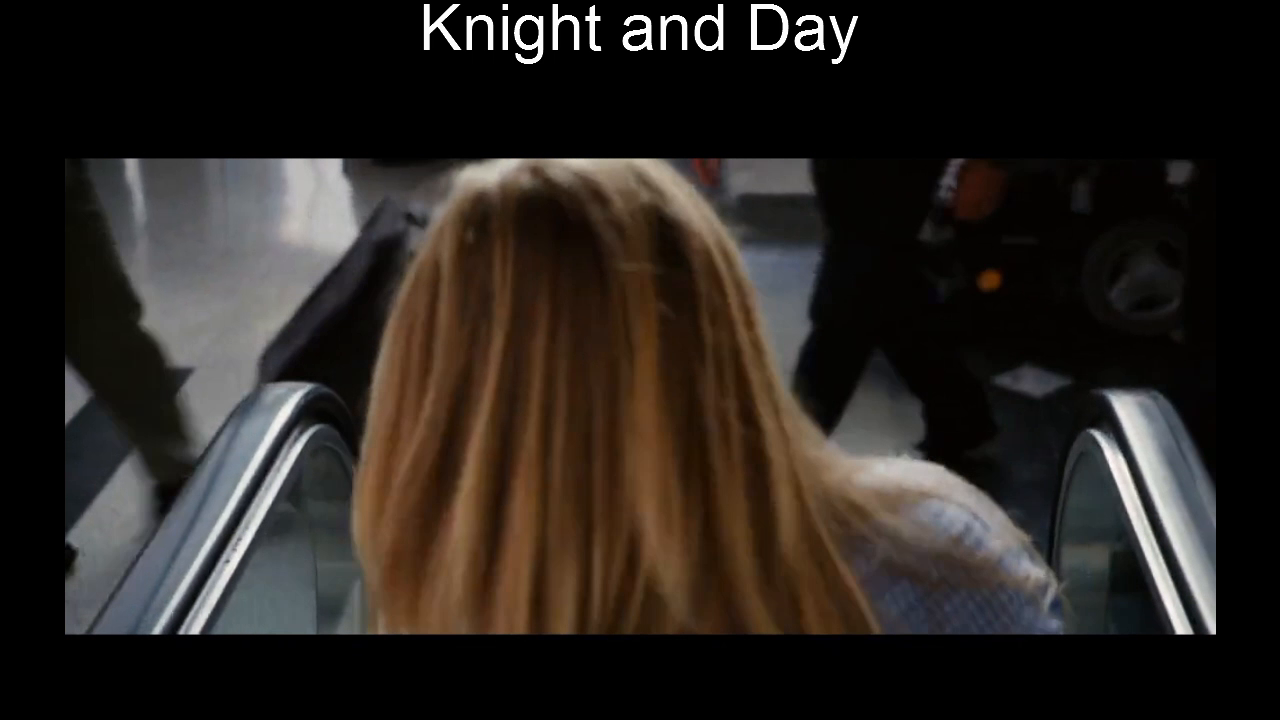

In [380]:
Image(str(STIM_PATH / 'b9efaf792ed563d492cf3bebcb36d5fbbac78a4a.png'))

In [392]:
def plot_top_bottom_all(predictor_name, n=4, bin_length=60, figsize=(40., 70.), resize=(480, 720)):
    n_datasets = 0
    loaded = []
    
    for dataset_id, task_id in dataset_tasks.values():
        sv = get_stimuli_values(predictor_name, dataset_id, task_id)
        if sv is None:
            continue
        n_datasets += 1
        sv_min, sv_max = bin_sv_min_max(sv, bin_length=bin_length)
        top_ps = sv_max.iloc[(-1-(n-1)):]['stimulus_path'].tolist()
        bottom_ps = sv_min.iloc[0:n]['stimulus_path'].tolist()


        loaded += [_load_impath(p, dims=resize) for p in bottom_ps + top_ps]

    fig = plt.figure(figsize=figsize)
    grid = ImageGrid(fig, 111,  # similar to subplot(111)
                     nrows_ncols=(n_datasets, n*2),  # creates 2x2 grid of axes
                     axes_pad=0.1,  # pad between axes in inch.
                     )

    for ax, im in zip(grid, loaded):
        # Iterating over the grid returns the Axes.
        ax.imshow(im)
        ax.axes.xaxis.set_visible(False)
        ax.axes.yaxis.set_visible(False)
        
    # Turn off tick marks
    plt.axis('off')
    plt.show()

/home/alejandro/anaconda3/lib/python3.7/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/home/alejandro/anaconda3/lib/python3.7/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


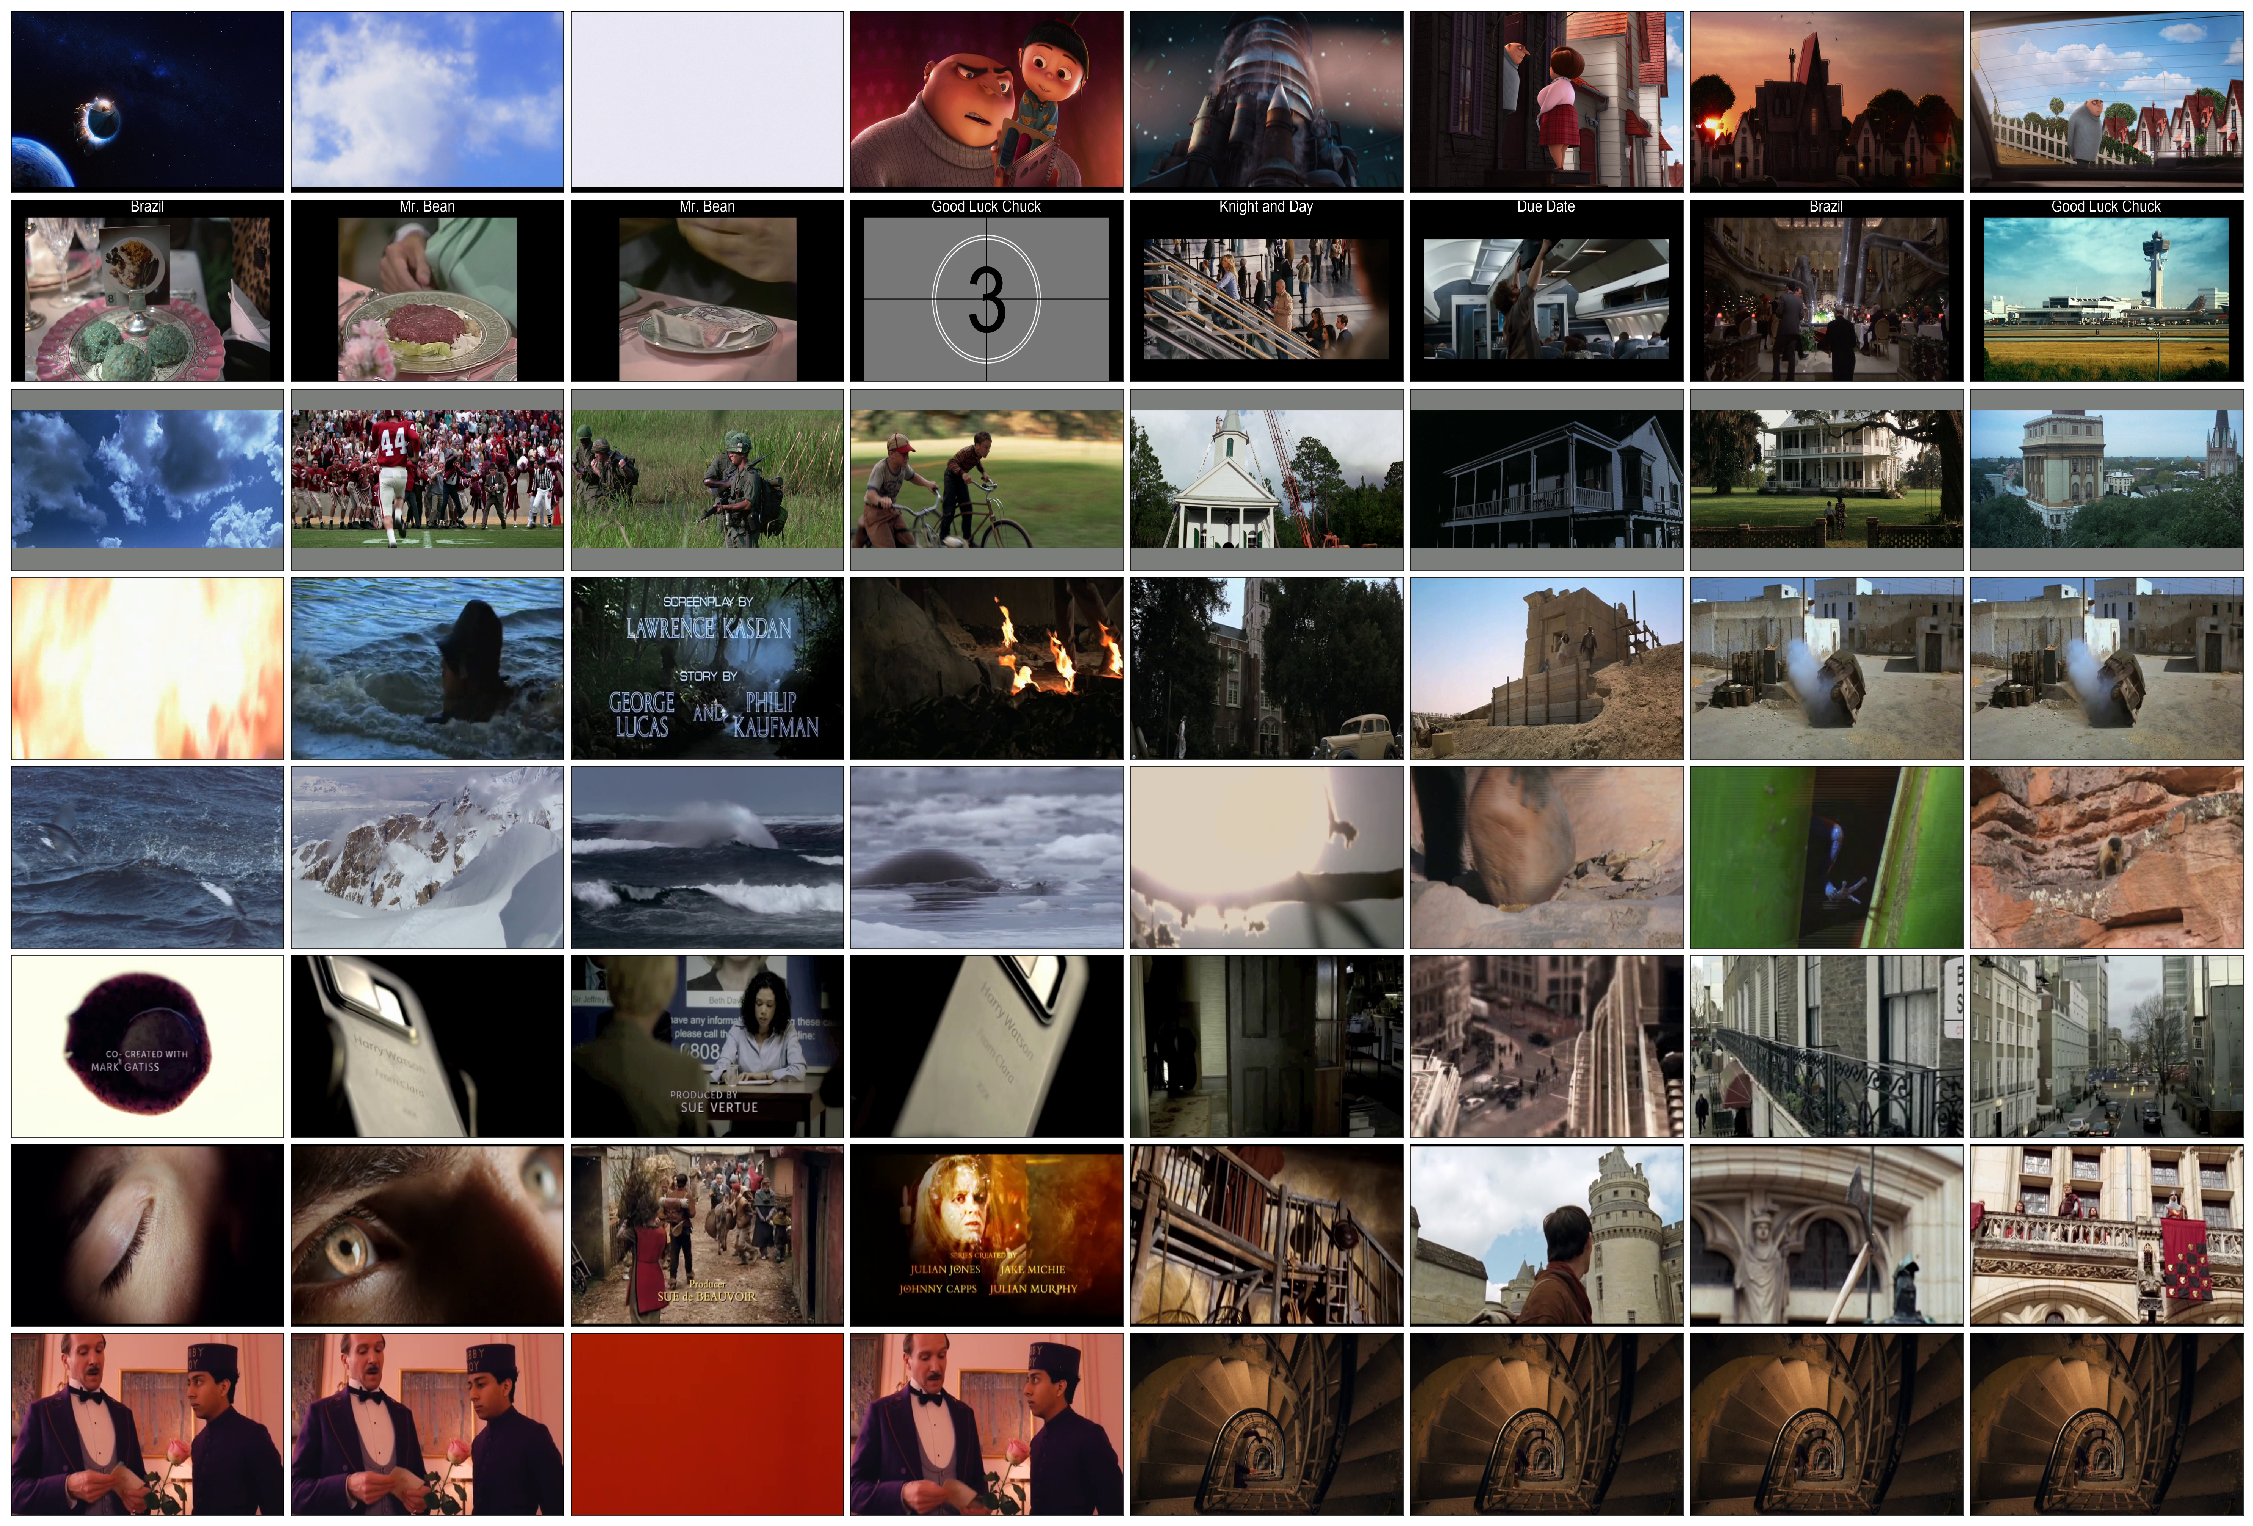

In [393]:
plt = plot_top_bottom_all('building', bin_length=60)

In [394]:
plot_top_bottom_all('hand', bin_length=60)

/home/alejandro/anaconda3/lib/python3.7/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/home/alejandro/anaconda3/lib/python3.7/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


AttributeError: 'NoneType' object has no attribute 'figure'

In [ ]:
plot_top_bottom_all('text', bin_length=60)

In [ ]:
plot_top_bottom_all('brightness', bin_length=60)

In [ ]:
plot_top_bottom_all('action', bin_length=60)

In [ ]:
plot_top_bottom_all('landscape', bin_length=60)

In [ ]:
plot_top_bottom_all('indoors', bin_length=60)

In [ ]:
plot_top_bottom_all('city', bin_length=60)

In [ ]:
plot_top_bottom_all('animal', bin_length=60)

In [ ]:
plot_top_bottom_all('music', bin_length=60)

In [ ]:
plot_top_bottom_all('vehicle', bin_length=60)

In [ ]:
plot_top_bottom_all('water', bin_length=60)

In [ ]:
plot_top_bottom_all('wood', bin_length=60)

In [ ]:
plot_top_bottom_all('tool', bin_length=60)